In [1]:
#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [1]:
suptitles = {a+topo : a+", "+{'_2pi':r"$\pi\pi$", '_pi_p':r"$\pi p$"}[topo] for a in 'D C Fe Pb'.split() for topo in '_2pi _pi_p'.split()}

In [4]:
from __future__ import absolute_import, division, print_function
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_memory_growth(physical_devices[1], True)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed

In [6]:
import time
import numpy as np
import pandas as pd
#import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
#from root_pandas import read_root
from matplotlib import rc
from numpy import inf


import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

#import root_pandas
%matplotlib inline

import uproot

rc('text', usetex=True)

import matplotlib as mpl
#rc('font', family='serif')
#rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [7]:
# Global plot settings
from matplotlib import rc
import matplotlib.font_manager

#rc('font', family='serif')
#rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

In [8]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [9]:
# Check Versions
print(tf.__version__)  # 1.15.0
print(tensorflow.keras.__version__)  # 2.2.4

2.11.0
2.11.0


## Obtain datasets and simulations

In [ ]:
import imp,root_pandas
imp.reload(root_pandas)
dfs_all = {a : root_pandas.read_root("Pairs_%s.root" %a.replace("D_",""),a) for a in "D_C D_Fe D_Pb".split()}
#now load MC
#dfs_all.update({'MC_'+a : root_pandas.read_root("/home/seba/CreatePairTuples/MC_Pairs_%s.root" %a,a) for a in "Pb D C Fe".split()})
dfs_all.update({'MC_'+a : root_pandas.read_root("MC_Pairs_%s_keep_all.root" %a,a) for a in "D".split()})

In [10]:
dfs_all['D'] = pd.concat([dfs_all['D_'+a] for a in 'C Fe Pb'.split()])

#for a in 'D_C D_Fe D_Pb'.split():
#    if a in dfs_all.keys():
#        del dfs_all[a]
#    if a+"_trigger" in dfs_all.keys():
#        del dfs_all[a+"_trigger"]

In [11]:
import R2h_module



for key in list(dfs_all.keys()):
    if '_2pi' in key or '_pi_p' in key or '_trigger' in key:
        continue
    df = dfs_all[key]
    print(df.columns)
    df.eval('inelasticity = nu/5.014', inplace=True)
    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    df.eval('pi='+str(np.pi),inplace=True) #not sure why eval doesn't know what pi is.  
    df.eval('diff_phi_cm = 2*pi*(diff_phi_cm<-pi)-2*pi*(diff_phi_cm>pi)')
    df.eval('h1_e = h1_z*nu', inplace=True)
    df.eval('h2_e = h2_z*nu', inplace=True)
    df.eval('h2_mass = 0.13957*(abs(h2_pid)==211)+.93827208816*(abs(h2_pid)==2212)', inplace=True)
    df.eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    df.eval('h2_p = sqrt(h2_e*h2_e-h2_mass*h2_mass)', inplace=True)
    df.eval('diff_rap_cm = drap',inplace=True)
    print(df.columns)
    if "MC" not in key:
        dfs_all[key+"_2pi"] = R2h_module.applyCuts(R2h_module.applyCutsPair(df,h2Proton=False)).query("h1_pid*h2_pid<0")
        
    else :
        dfs_all[key+"_2pi"] = R2h_module.applyCuts(df).query("h1_truth_pid*h2_truth_pid==-211**2").query("h2_truth_z>0.05")
    

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt'],
      dtype='object')
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
  

h1_pid = pions (trigger) 1294939  (99.02  %)
2.2 < nu <4.2 1292354  (99.80  %)
10< h1_th 1203540  (93.13  %)
Theta/P fiducial region selected for trigger hadron 977457  (81.22  %)
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid',
       'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt',
       'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25',
       'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th',
       'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe',
       'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus',
       'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC',
       'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt'],
      dtype='object')
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', '

In [12]:
for key in list(dfs_all.keys()):
    if '_trigger' not in key or "_cut" in key:
        continue
    df = dfs_all[key]
    print(df.columns)
    df.eval('inelasticity = nu/5.014', inplace=True)
    df.eval('pi='+str(np.pi),inplace=True) #not sure why eval doesn't know what pi is. 
    df.eval('h1_e = h1_z*nu', inplace=True)
    df.eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
    print(df.columns)
    dfs_all[key+"_cut"] = R2h_module.applyCuts(df)
# for key in list(dfs_mixed.keys()): 
#     if '_2pi' in key or '_pi_p' in key:
#         continue
#     print('key is ',key)
#     dfs_mixed[key+"_2pi"] = applyCuts(applyCutsPair(dfs_mixed[key],dipion=True))
#     dfs_mixed[key+"_pi_p"] = applyCuts(applyCutsPair(dfs_mixed[key],pi_p=True))
# for key in list(dfs_trigger.keys()):
#     if '_2pi' in key or '_pi_p' in key:
#         continue
#     dfs_trigger[key] = applyCuts(dfs_trigger[key])

In [14]:
for key in dfs_all.keys():
    df = dfs_all[key]
    if not "_trigger" in key:
        df['pass_reco'] = np.where((df['h1_cm_pt']>0) & (df['h2_cm_pt']>0)& (df['Q2']>0), 1, 0)
    else :
        df['pass_reco'] = np.where((df['h1_cm_pt']>0)&(df['Q2']>0), 1, 0) 
    if 'h2_truth_cm_pt' in df.columns:
        df['pass_truth'] = np.where((df['h2_truth_cm_pt']>0) & (df['Q2_truth']>0) & (df['h1_truth_cm_pt']>0), 1, 0)
    else:
        df['pass_truth'] = np.where(df['Q2']>0, 1, 0)


#mc_hadron['pass_reco'] = np.where(mc_hadron['h_cm_pt']>0, 1, 0)
#mc_hadron['pass_truth'] = np.where(mc_hadron['h_truth_cm_pt']*mc_hadron['Q2']>0, 1, 0)
#data_hadron['pass_reco'] = np.where(data_hadron['h_cm_pt']>0, 1, 0)

In [15]:
#patch the things that are zero
for df in dfs_all.values():
    for column in df.columns:
        if "truth" in column and (not "pass" in column) and column != "E":
            df[column] = df[column]*df.pass_truth+(1-df.pass_truth)*-9999
        if not "truth" in column and (not "pass" in column) and column != "E":
            df[column] = df[column]*df.pass_reco+(1-df.pass_reco)*-9999



In [17]:

print(dfs_all.keys())
print(dfs_all['MC_D_2pi'].columns)
q_mc={"_2pi":"h1_truth_pid*h2_truth_pid==-211**2", 
      "_pi_p":"abs(h1_truth_pid)==211 and h2_truth_pid==2212", 
      "_trigger_cut": "abs(h1_truth_pid)==211 and h1_truth_z>0.5"}
dfs_data = {a+topo : dfs_all[a+topo] for a in 'D'.split() for topo in '_2pi'.split()}
dfs_mc = {a+topo : dfs_all['MC_' + a+topo] for a in 'D'.split() for topo in '_2pi'.split()}


dict_keys(['D_C', 'D_Fe', 'D_Pb', 'MC_D', 'D', 'D_C_2pi', 'D_Fe_2pi', 'D_Pb_2pi', 'MC_D_2pi', 'D_2pi'])
Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap',
       ...
       'pi', 'h1_e', 'h2_e', 'h2_mass', 'h1_p', 'h2_p', 'diff_rap_cm',
       'h1_mass_TOF', 'pass_reco', 'pass_truth'],
      dtype='object', length=114)


## You want reasonable sample of MC,
## Try at minimum e.g x 3 the data size

In [18]:

for key in dfs_data.keys():
    print(key, len(dfs_data[key]), len(dfs_mc[key]), len(dfs_mc[key])*1./len(dfs_data[key]))
    trimlength = int(len(dfs_mc[key])/3)
    dfs_data[key] = dfs_data[key][:trimlength]
#print(len(data))
#print(len(mc.query('pass_reco==1'))) ##only what is really reconstructed counts
#print(len(mc)) ##only what is really reconstructed counts

D_2pi 526916 445265 0.8450398165931572


## Unfold Data

In [19]:
from __future__ import absolute_import, division, print_function
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))





def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    
    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    t_loss = -weights * ((y_true) * K.log(y_pred) +
                         (1 - y_true) * K.log(1 - y_pred))
    
    return K.mean(t_loss)
def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S,weights_MC_sim=None,weights_MC_data=None,verbose=1):
    
    if weights_MC_sim is None:
        weights_MC_sim = np.ones(len(theta0_S))
    
    if weights_MC_data is None:
        weights_MC_data = np.ones(len(theta_unknown_S))
    
    
    theta0 = np.stack([theta0_G, theta0_S], axis=1)
    labels0 = np.zeros(len(theta0))
    theta_unknown = np.stack([theta_unknown_S, theta_unknown_S], axis=1)
    labels1 = np.ones(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))
    
    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))
    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels1))
    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    
    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
    model = Model(inputs=inputs, outputs=outputs)
    earlystopping = EarlyStopping(patience=10,
                              verbose=verbose,
                              restore_best_weights=True)
    
    # from NN (DCTR) 
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(np.nan_to_num(weights))
    
    
    
    weights_pull = weights_MC_sim
    weights_push = weights_MC_sim
    
    #weights_pull = np.ones(len(theta0_S))
    #weights_push = np.ones(len(theta0_S))
    
    history = {}
    history['step1'] = []
    history['step2'] = []
    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))
        print("STEP 1\n")
        
        weights_1 = np.concatenate((weights_push,weights_MC_data ))
        
        
      
        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
        xvals_1, yvals_1, weights_1)
        
        Y_train_1 = np.stack((Y_train_1, w_train_1), axis=1)
        Y_test_1 = np.stack((Y_test_1, w_test_1), axis=1)
            
            
        batch_size=10000
        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        
        hist_s1 =  model.fit(X_train_1,
              Y_train_1,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_1, Y_test_1),
              callbacks=[earlystopping],
              verbose=verbose)
        
        history['step1'].append(hist_s1)
        weights_pull = weights_push * reweight(theta0_S)
        weights_pull[theta0_S[:,0]==-10] = 1
        weights[i, :1, :] = weights_pull
        
        print("\nSTEP 2\n")
        weights_2 = np.concatenate((weights_MC_sim, weights_pull))

        #weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for MC Truth (not MC weights), actual weights for (reweighted) MC Truth
        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)
    
        # zip ("hide") the weights with the labels
        Y_train_2 = np.stack((Y_train_2, w_train_2), axis=1)
        Y_test_2 = np.stack((Y_test_2, w_test_2), axis=1)
        model.compile(loss=weighted_binary_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
        hist_s2 = model.fit(X_train_2,
              Y_train_2,
              epochs=200,
              batch_size=batch_size,
              validation_data=(X_test_2, Y_test_2),
              callbacks=[earlystopping],
              verbose=verbose)
        
        history['step2'].append(hist_s2)

        #weights_push = reweight(theta0_G)
        weights_push = weights_MC_sim * reweight(theta0_G)

        weights[i, 1:2, :] = weights_push
   
    return weights, model, history

 

In [20]:
help(multifold)

Help on function multifold in module __main__:

multifold(num_observables, iterations, theta0_G, theta0_S, theta_unknown_S, weights_MC_sim=None, weights_MC_data=None, verbose=1)



In [21]:
import unfold
import tensorflow.keras.backend as K
def run_omnifold(df_data,df_mc, observable_names_reco, observable_names_truth, iterations=4):
    K.clear_session()
    
    num_observables = len(observable_names_reco)
    theta0_G=np.c_[tuple((np.array(df_mc[obs]) for obs in observable_names_truth))]
    theta0_S=np.c_[tuple((np.array(df_mc[obs]) for obs in observable_names_reco))]
    theta_unknown_S=np.c_[tuple((np.array(df_data[obs]) for obs in observable_names_reco))]

    print(len(df_mc))
    print(theta0_S)
    print(len(theta0_G[0]))
    print(len(df_mc))
    pass_reco = np.array(df_mc['pass_reco'])
    pass_truth = np.array(df_mc['pass_truth'])
    theta0_S[:,0][pass_reco==0] = -10
    theta0_G[:,0][pass_truth==0] = -10


    import time,os
    start = time.perf_counter()
    #try:
    weights, model, history = unfold.multifold(num_observables=num_observables,
                           iterations=iterations,
                           theta0_G=theta0_G,
                           theta0_S=theta0_S,
                           theta_unknown_S= theta_unknown_S)

    duration = time.perf_counter()-start
    print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", duration % 60, "seconds")
    os.system('say "your program has finished"')
    
    return weights, model, history
#finally : 
#    duration = time.perf_counter()-start
#    print("total time: ",duration//3600,"hours", (duration//60)%60, "minutes", duration % 60, "seconds")
#    os.system('say "your program has crashed"')

In [22]:
dfs_data = dict(dfs_data)
dfs_mc = dict(dfs_mc)

weights = {}
models = {}
histories = {}

#variables used in the PRL paper's analysis note
#variables = 'pair_mass dphi h1_z h2_z x Q2 h1_cm_pt h2_cm_pt h1_pid'.split()
#variables_truth = 'pair_mass_truth dphi_truth h1_truth_z h2_truth_z x_truth Q2_truth h1_truth_cm_pt h2_truth_cm_pt h1_truth_pid'.split()


variables = 'pair_mass h1_cm_ph h2_cm_ph h1_z h2_z x Q2 h1_cm_pt h2_cm_pt h1_pid'.split()
variables_truth = 'pair_mass_truth h1_truth_cm_ph h2_truth_cm_ph h1_truth_z h2_truth_z x_truth Q2_truth h1_truth_cm_pt h2_truth_cm_pt h1_truth_pid'.split()

#for variable in variables:
#    print(dfs_data['D_2pi'].dtypes[variable])
for a in 'D C Fe Pb'.split():
    for topo in '_2pi'.split():
        name = a+topo
        #if not name in ('C_2pi', 'C_pi_p', 'D_2pi'):#for now, only do this for the carbon MCs and D_2pi
        #    continue
        weights[name], models[name], histories[name] = run_omnifold(dfs_data[name],dfs_mc[name], variables, variables_truth, iterations=4)
            
        

445265
[[ 2.06135091e+04 -3.11212150e+00 -2.56391140e+00 ...  5.24874758e-01
   1.60037248e+04  2.11000000e+02]
 [ 3.88414957e-01  2.93513366e+00  2.64898358e+00 ...  4.54153518e-01
   1.22110239e-01 -2.11000000e+02]
 [ 5.06749128e-01  2.93513366e+00 -1.94562545e+00 ...  4.54153518e-01
   1.94569053e-01 -2.11000000e+02]
 ...
 [ 2.26184238e+04 -3.12926982e+00 -3.03613920e-01 ...  1.47029707e-01
   1.09681635e+04  2.11000000e+02]
 [ 2.78011372e+04  1.73475185e+00 -2.64292187e+00 ...  1.52099698e-01
   1.57037509e+04  2.11000000e+02]
 [ 2.66113109e+04  6.92418488e-01 -1.40557809e+00 ...  1.17092652e-01
   1.35562329e+04  2.11000000e+02]]
10
445265
ITERATION: 1
STEP 1...
Epoch 1/1000
90/90 [==============================] - 1s 5ms/step - loss: 0.6590 - accuracy: 0.4977 - val_loss: 0.3554 - val_accuracy: 0.3752
Epoch 2/1000
90/90 [==============================] - 0s 4ms/step - loss: 0.3829 - accuracy: 0.5043 - val_loss: 0.3658 - val_accuracy: 0.6249
Epoch 3/1000
90/90 [====================

Epoch 6/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3658 - accuracy: 0.4134 - val_loss: 0.3589 - val_accuracy: 0.4136
Epoch 7/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.4145 - val_loss: 0.3547 - val_accuracy: 0.4180
Epoch 8/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.4154 - val_loss: 0.3470 - val_accuracy: 0.4149
Epoch 9/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.4163 - val_loss: 0.3433 - val_accuracy: 0.4160
Epoch 10/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.4161 - val_loss: 0.3402 - val_accuracy: 0.4131
Epoch 11/1000
134/134 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.4156 - val_loss: 0.3366 - val_accuracy: 0.4142
Epoch 12/1000
134/134 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.4150 - val_loss: 0.3360 - val_accura

134/134 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.4172 - val_loss: 0.3124 - val_accuracy: 0.4173
Epoch 63/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3171 - accuracy: 0.4175 - val_loss: 0.3135 - val_accuracy: 0.4162
Epoch 64/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.4174 - val_loss: 0.3132 - val_accuracy: 0.4168
Epoch 65/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3164 - accuracy: 0.4174 - val_loss: 0.3156 - val_accuracy: 0.4168
Epoch 66/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.4175 - val_loss: 0.3146 - val_accuracy: 0.4170
Epoch 67/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.4175 - val_loss: 0.3147 - val_accuracy: 0.4160
Epoch 68/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.4178 - val_loss: 0.3135 - val_accuracy: 0.4165

134/134 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.4194 - val_loss: 0.3094 - val_accuracy: 0.4166
Epoch 119/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.4191 - val_loss: 0.3096 - val_accuracy: 0.4194
Epoch 120/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.4193 - val_loss: 0.3089 - val_accuracy: 0.4183
Epoch 121/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.4190 - val_loss: 0.3085 - val_accuracy: 0.4189
Epoch 122/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.4194 - val_loss: 0.3099 - val_accuracy: 0.4189
Epoch 123/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.4192 - val_loss: 0.3106 - val_accuracy: 0.4179
Epoch 124/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.4194 - val_loss: 0.3097 - val_accuracy: 

Epoch 13/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 0.5157 - val_loss: 0.2459 - val_accuracy: 0.5179
Epoch 14/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.5163 - val_loss: 0.2455 - val_accuracy: 0.5160
Epoch 15/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2457 - accuracy: 0.5156 - val_loss: 0.2472 - val_accuracy: 0.5135
Epoch 16/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.5154 - val_loss: 0.2456 - val_accuracy: 0.5158
Epoch 17/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2456 - accuracy: 0.5157 - val_loss: 0.2439 - val_accuracy: 0.5195
Epoch 18/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.5162 - val_loss: 0.2446 - val_accuracy: 0.5177
Epoch 19/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.5162 - val_loss: 0.2442 - val_accuracy: 0.5186

90/90 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.5200 - val_loss: 0.2396 - val_accuracy: 0.5217
Epoch 71/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.5203 - val_loss: 0.2408 - val_accuracy: 0.5194
Epoch 72/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2400 - accuracy: 0.5200 - val_loss: 0.2386 - val_accuracy: 0.5208
Epoch 73/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.5202 - val_loss: 0.2414 - val_accuracy: 0.5143
Epoch 74/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.5200 - val_loss: 0.2387 - val_accuracy: 0.5200
Epoch 75/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.5202 - val_loss: 0.2387 - val_accuracy: 0.5201
Epoch 76/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2393 - accuracy: 0.5204 - val_loss: 0.2390 - val_accuracy: 0.5219
Epoch 77/1000

134/134 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.4269 - val_loss: 0.2600 - val_accuracy: 0.4223
Epoch 36/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.4270 - val_loss: 0.2573 - val_accuracy: 0.4237
Epoch 37/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2609 - accuracy: 0.4272 - val_loss: 0.2596 - val_accuracy: 0.4231
Epoch 38/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.4269 - val_loss: 0.2574 - val_accuracy: 0.4258
Epoch 39/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.4272 - val_loss: 0.2579 - val_accuracy: 0.4241
Epoch 40/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.4272 - val_loss: 0.2580 - val_accuracy: 0.4266
Epoch 41/1000
134/134 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.4275 - val_loss: 0.2574 - val_accuracy: 0.4271

90/90 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.5102 - val_loss: 0.2448 - val_accuracy: 0.5139
Epoch 19/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.5098 - val_loss: 0.2430 - val_accuracy: 0.5115
Epoch 20/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.5098 - val_loss: 0.2448 - val_accuracy: 0.5132
Epoch 21/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.5107 - val_loss: 0.2430 - val_accuracy: 0.5100
Epoch 22/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2438 - accuracy: 0.5096 - val_loss: 0.2437 - val_accuracy: 0.5081
Epoch 23/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.5103 - val_loss: 0.2439 - val_accuracy: 0.5102
Epoch 24/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.5097 - val_loss: 0.2440 - val_accuracy: 0.5110
Epoch 25/1000

Epoch 24/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2530 - accuracy: 0.5112 - val_loss: 0.2518 - val_accuracy: 0.5104
Epoch 25/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.5112 - val_loss: 0.2524 - val_accuracy: 0.5127
Epoch 26/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.5112 - val_loss: 0.2520 - val_accuracy: 0.5120
Epoch 27/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.5106 - val_loss: 0.2521 - val_accuracy: 0.5106
Epoch 28/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.5121 - val_loss: 0.2524 - val_accuracy: 0.5101
Epoch 29/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.5111 - val_loss: 0.2523 - val_accuracy: 0.5104
Epoch 30/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.2527 - accuracy: 0.5114 - val_loss: 0.2522 - val_accuracy: 0.5088

KeyError: 'C_2pi'

In [23]:
for key in weights.keys():
    dfs_mc[key]['weight_reco'] = weights[key][-1, 0, :]
    dfs_mc[key]['weight_truth'] = weights[key][-1, 1, :]

<ipython-input-23-3f2292be900d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfs_mc[key]['weight_reco'] = weights[key][-1, 0, :]
<ipython-input-23-3f2292be900d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfs_mc[key]['weight_truth'] = weights[key][-1, 1, :]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0


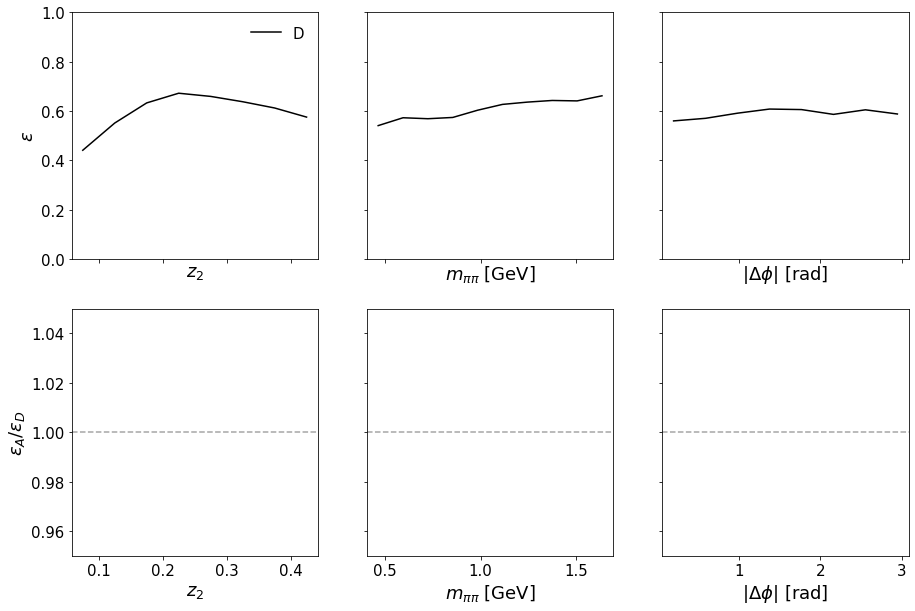

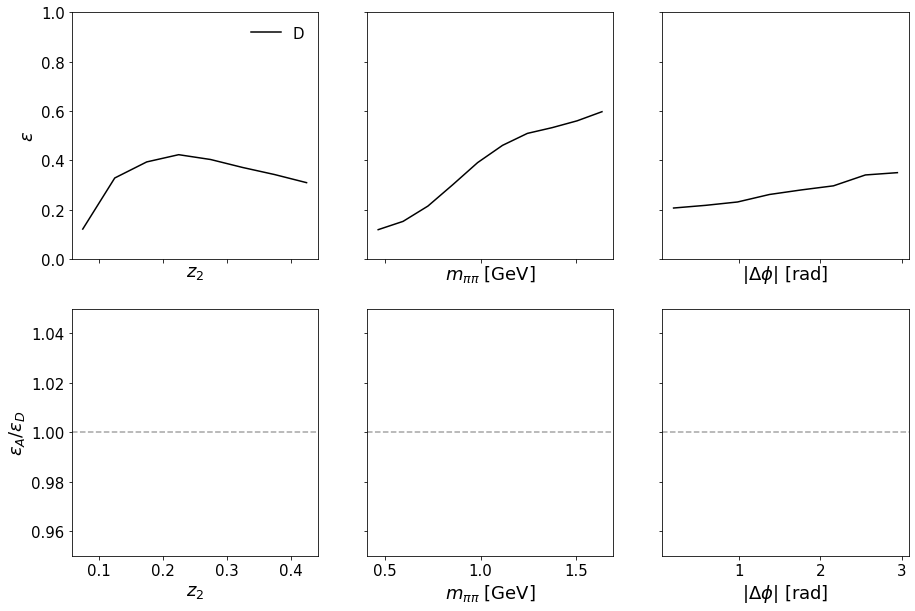

In [24]:
for w in [True, False]:
    fig, axs= plt.subplots(2,3, figsize=(15,10),sharey='row', sharex='col')
    sumsq = 0
    for i,(bins, xvar_truth) in enumerate([(np.linspace(0.05,.45,9),'h2_truth_z'),
                            (np.linspace(0.4,1.7,11),'pair_mass_truth'),
                            (np.linspace(0,np.pi,9),'dphi_truth')]):
        for a in "D".split():

            df = dfs_mc[f'{a}_2pi']#.query("weight_truth>0")
            w_default = np.mean(df.query("pass_recon==1").weight_truth)
            if w:
                weight=f"weight_truth*pass_reco+(pass_reco!=0)*{w_default}"
                weight=f"weight_truth"
            else :
                weight = "Q2/Q2"
            n_pass,x = np.histogram(df.query("pass_recon==1")[xvar_truth],
                                    weights=df.query("pass_recon==1").eval(weight),
                                    bins=bins)
            n_tot,x = np.histogram(df[xvar_truth], 
                                    weights=df.eval(weight),
                                    bins=bins)
            bin_centers = 0.5*(x[1:]+x[:-1])

            plt.sca(axs[0][i]) 
            plt.plot(bin_centers, (n_pass/n_tot), color='k' if a == 'D' else None,label=a)
            if(a=='D'):
                n_pass_D = n_pass
                n_tot_D = n_tot

            else :
                plt.sca(axs[1][i]) 
                y = (n_pass/n_tot)/(n_pass_D/n_tot_D)
                sumsq +=sum((y-1)**2)
                plt.plot(bin_centers, y,label=a)
        axs[1][i].axhline(1, color='0.5', alpha=0.7, linestyle='--')
    axs[0][0].legend()
    axs[0][0].set_ylabel("$\epsilon$")
    axs[1][0].legend()
    axs[1][0].set_ylabel("$\epsilon_A/\epsilon_D$")
    
    axs[0][0].set_xlabel("$z_2$")
    axs[0][1].set_xlabel("$m_{\pi\pi}$ [GeV]")
    axs[0][2].set_xlabel("$|\Delta\phi|$ [rad]")
    axs[1][0].set_xlabel("$z_2$")
    axs[1][1].set_xlabel("$m_{\pi\pi}$ [GeV]")
    axs[1][2].set_xlabel("$|\Delta\phi|$ [rad]")
    axs[0][0].set_ylim(0,1)
    axs[1][0].set_ylim(0.95,1.05)
    print(np.sqrt(sumsq/26))
    if w :
        plt.savefig("images/efficiency_weighted.png")
    else :
        plt.savefig("images/efficiency_unweighted.png")
    

In [ ]:
plt.hist(dfs_mc['D_2pi'].query("pass_recon==1").weight_truth,bins=100, label="pass recon")
plt.hist(dfs_mc['D_2pi'].query("pass_recon!=1").weight_truth,bins=100, label="fail recon")
plt.gca().set_xlabel("weight_truth")
plt.gca().legend()
plt.show()

In [ ]:
weights_tr = {}
models_tr = {}
histories_tr = {}

variables = 'h1_z x Q2 h1_cm_pt h1_cm_ph'.split()

#for variable in variables:
#    print(dfs_data['D_2pi'].dtypes[variable])
for a in 'D'.split():
    for topo in '_trigger_cut'.split():
        name = a+topo
        
        weights_tr[name], models_tr[name], histories_tr[name] = run_omnifold(dfs_data[name],dfs_mc[name], variables, variables, iterations=4)



In [ ]:
for key in weights_tr.keys():
    dfs_mc[key]['weight_reco'] = weights_tr[key][-1, 0, :]
    dfs_mc[key]['weight_truth'] = weights_tr[key][-1, 1, :]
    
print(weights_tr['D_trigger_cut'][-1,1,:])

In [ ]:
print(dfs_mc['C_2pi'].columns)
    

In [ ]:
#list all data in history
# summarize history for accuracy

def make_history_plots(key):
    history = histories[key]
    for i in range(4):
        fig,ax = plt.subplots(1,2,figsize=(16,6))
        ax[0].set_title('Step 1: \nreweight sim. from data')
        ax[0].set_xlabel('epoch number')
        ax[0].plot(history['step1'][i].history['loss'][1:],'o',label='Step 1 train loss')
        ax[0].plot(history['step1'][i].history['val_loss'][1:],'o',label='Step 1 test loss')
        ax[0].legend()

        #ax[1].set_title('model accuracy')
        #ax[1].plot(history['step1'][i].history['accuracy'][1:],'o',label='Step 1 train')
        #ax[1].plot(history['step1'][i].history['val_accuracy'][1:],'o',label='Step 1 test')
        #ax[1].legend()
        #ax[1].set_xlabel('epoch number')

        ax[1].set_title('Step 2: \nreweight gen. from sim.')
        ax[1].set_xlabel('epoch number')
        ax[1].plot(history['step2'][i].history['loss'][1:],'o',label='Step 2 train loss')
        ax[1].plot(history['step2'][i].history['val_loss'][1:],'o',label='Step 2 test loss')
        ax[1].legend()

        #ax[3].set_title('model accuracy')
        #ax[3].plot(history['step2'][i].history['accuracy'][1:],'o',label='Step 2 train')
        #ax[3].plot(history['step2'][i].history['val_accuracy'][1:],'o',label='Step 2 test')
        #ax[3].legend()
        #ax[3].set_xlabel('epoch number')

        #for a in ax:
        #    a.set_ylim(0)
        plt.savefig(f"images/reweight_history_iter_{i}_{key}.png",bbox_inches='tight')

In [ ]:
make_history_plots('C_2pi')
make_history_plots('D_2pi')

## Plot data and MC reweighted

In [ ]:
## This is what in Ben's notebook. 
## The _S is RECO level. 
## You require that the RECO dataframe has a valid pass reco.
## The G is the truth level
## You required that the truth level has pass_truth valid.

In [ ]:
#


def reweight_summary_plots(setname, showIter=False):
    df_data = dfs_data[setname].query("h1_pid*h2_pid<0")
    df_mc = dfs_mc[setname].query("h1_pid*h2_pid<0")
    for i in (len(weights[setname])-1,):
        pass_reco = df_mc.pass_reco != 0
        print(len(pass_reco))
        print("ITERATION: {}".format(i + 1))
        for df in df_data, df_mc:
            if not 'diff_phi_lab' in df.columns:
                df.eval('diff_phi_lab = (h1_ph-h2_ph)',inplace=True)
                df['diff_phi_lab'] = df.diff_phi_lab+(df.diff_phi_lab>180)*-360+(df.diff_phi_lab<-180)*360
        fig, ax = plt.subplots(3,
                               3,
                               figsize=(16, 16),
                               constrained_layout=True)
        #fig.suptitle(suptitles[setname])

        bins = [[np.linspace(0.0, 4.2, 40), np.linspace(0, 0.6, 50), np.linspace(-np.pi, np.pi, 50)],
               [np.linspace(0, 1, 50), np.linspace(0, 1.5, 50), np.linspace(-np.pi, np.pi, 50)],
               [np.linspace(0, 1, 50), np.linspace(0, 1.5, 50), np.linspace(0.3, 1.7, 50)]]
        xlabels = [[r'$Q^{2}$ [GeV$^2$]', r'$x$', r'$\Delta\phi_{\mathrm{lab}}$ [rad]'],
                  [r'$z_1$', r'$p^1_T$ [GeV]', r'$\Delta\phi$ [rad]'],
                  [r'$z_2$', r'$p^2_T$ [GeV]', r'$m_{\pi\pi}$ [GeV]']]
        xvars = [['Q2', 'x', f'diff_phi_lab*{np.pi}/180'],
                ['h1_z', 'h1_cm_pt','diff_phi_cm'],
                ['h2_z', 'h2_cm_pt','pair_mass']]

        for row in range(3):
            for col in range(3):

                ax[row,col].set_xlabel(xlabels[row][col])
                ax[row,col].set_ylabel('Events per bin (Normalized)')
                #ax[row,col].hist(df_mc[xvars[row][col]][pass_reco], bins=bins[row][col], label=r'MC .', **plot_style_2)
                #print(len(weights), len(weights[i,0,:]), len(pass_reco),len(df_data))

                ax[row,col].hist(df_mc[pass_reco].eval(xvars[row][col]),
                           bins=bins[row][col],
                           weights=weights[setname][i, 0, :][pass_reco],
                           label=r'MC',
                           **plot_style_2)

                #ax[row,col].hist(df_data[xvars[row][col]],
                #           bins=bins[row][col],
                #           label=r'Data (reco)',
                #           **plot_style_2)
                y,x = np.histogram(df_data.eval(xvars[row][col]),
                           bins=bins[row][col])
                
                denom = np.sum(y)*(x[1]-x[0])
                #print(y/denom)
                x = 0.5*(x[1:]+x[:-1])#bin centers
                ax[row,col].errorbar(x,y/denom,np.sqrt(y)/denom, color='k', label='Data (recon)')
                
                if row == 0 and col == 0:
                    ax[row,col].legend(frameon=False,loc='best')


        fig.savefig(f"images/reweight_summary_{setname}_iter{i}.png",bbox_inches='tight')

In [ ]:
reweight_summary_plots('C_2pi')
#reweight_summary_plots('C_pi_p')
reweight_summary_plots('D_2pi')

## Put weights obtained with the DNN back into the mc dataframe:

In [ ]:
help(root_pandas)

In [ ]:
for a in "D".split():
    df = dfs_mc[f'{a}_2pi']#.query("weight_truth>0")
    w_default = np.mean(df.query("pass_recon==1").weight_truth)
    df['weight_truth']=df.eval(f"weight_truth*pass_reco+(pass_reco!=0)*{w_default}")

In [26]:
for a in "D".split():
    
    d = {f'D' : dfs_mc['D_2pi']}
    root_pandas.to_root_multi(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",d)

In [29]:
#for key in weights.keys():
#    dfs_mc[key]['weight_reco'] = weights[key][-1, 0, :]
#    dfs_mc[key]['weight_truth'] = weights[key][-1, 1, :]
#    dfs_mc[key].to_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{key}.root","dihadrons")

# slice plots

In [30]:
def slice_plot(key, xvar,xlabel, bins, slicevar, slicelabel, partitions,
               suptitle=None, sliceUnit=None, legend=False):
    df_mc =dfs_mc[key].query("h1_pid*h2_pid<0")
    df_data =dfs_data[key].query("h1_pid*h2_pid<0")
    fig, axs = plt.subplots(1, len(partitions)-1, 
                            figsize=(4*(len(partitions)-1), 4),sharex='all')
    fig.subplots_adjust(wspace=0)
    if suptitle is not None:
        fig.suptitle(suptitle, y=1.15)
    
    axs[0].set_ylabel('Events per bin (Normalized)')
    for i in range(len(partitions)-1):
        query = f'{slicevar}>{partitions[i]} and {slicevar}<{partitions[i+1]}'
        axs[i].set_xlabel(xlabel)
        title = f'{partitions[i]} <{slicelabel}<{partitions[i+1]}'
        if sliceUnit !=None:
            title += f'[{sliceUnit}]'
        axs[i].set_title(title,fontsize='medium')                 
        mc = df_mc.query(query).query("pass_reco != 0")
        #axs[i].hist(mc.eval(xvar), bins=bins, label=r'MC .', **plot_style_2)
        #print(len(weights), len(weights[i,0,:]), len(pass_reco),len(df_data))

        axs[i].hist(mc.eval(xvar),
                   bins=bins,
                   weights=mc.weight_reco,
                   label=r'MC',
                   **plot_style_2)

        #axs[i].hist(df_data.query(query).eval(xvar),
        #           bins=bins,
        #           label=r'Data (recon)',
        #           **plot_style_2)
        y,x = np.histogram(df_data.query(query).eval(xvar),
                           bins=bins)        
        denom = np.sum(y)*(x[1]-x[0])
        x = 0.5*(x[1:]+x[:-1])#bin centers
        axs[i].errorbar(x,y/denom,np.sqrt(y)/denom, color='k', label='Data (recon)')
        
        if i==0 and legend:
            axs[i].legend(frameon=False,loc='best')
    plt.savefig(f"images/reweight_eg2_slices_{slicevar}_vs_{xvar}_{key}.png",bbox_inches='tight')
        


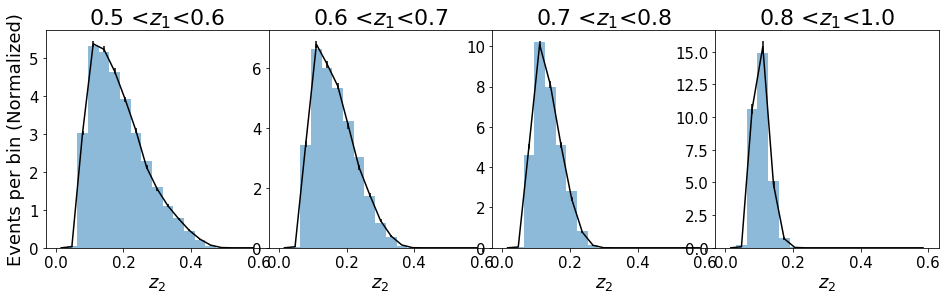

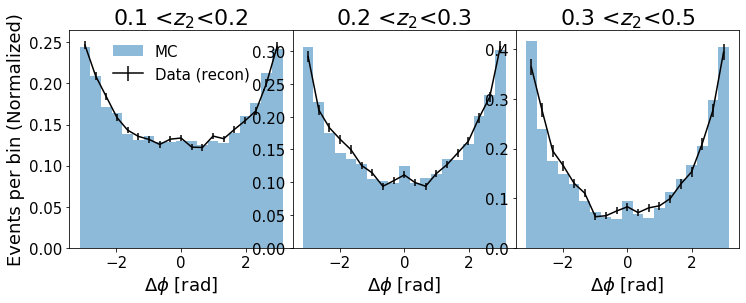

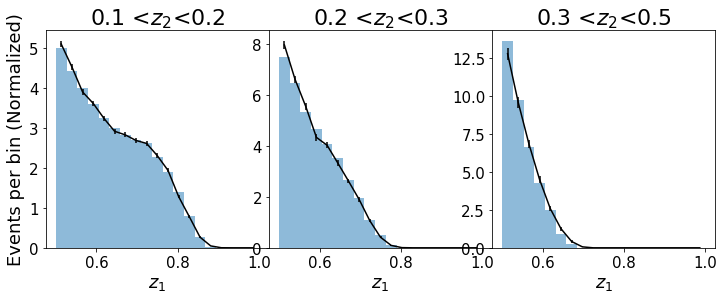

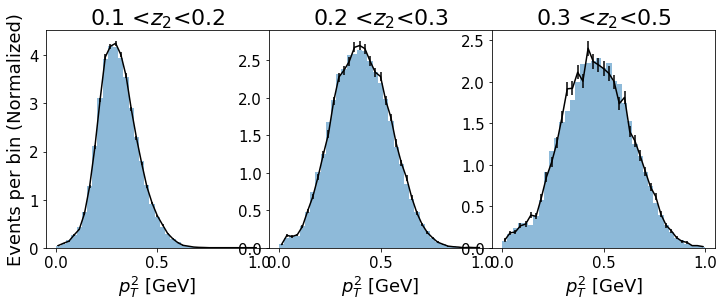

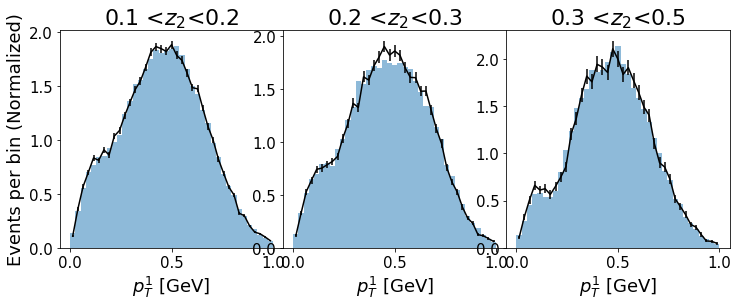

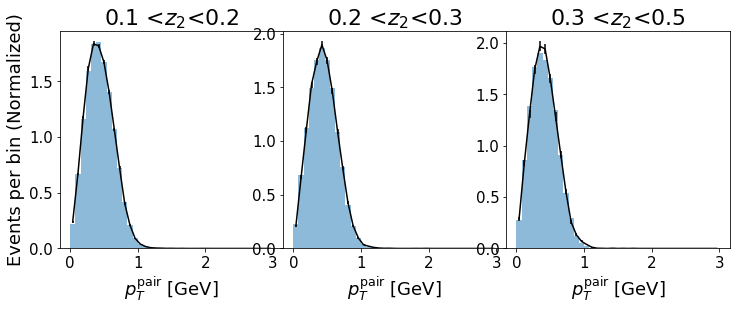

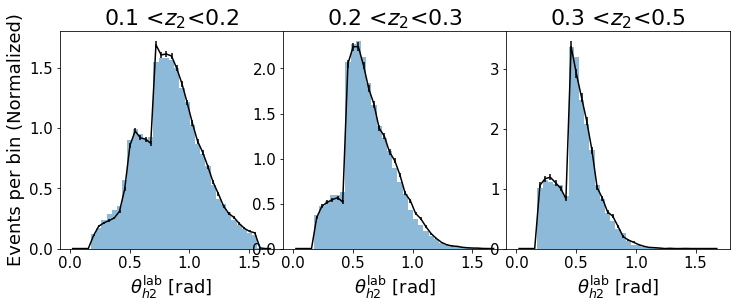

In [31]:

for key in 'D_2pi'.split():
    #determine the suptitle to use
    suptitle = None #suptitles[key]
    
    #z1 slices, z2 bins
    slice_plot(key, 'h2_z', '$z_2$', np.linspace(0,.6 if '2pi' in key else .8, 20), 
               'h1_z', '$z_1$', (0.5, 0.6, 0.7, 0.8,1.0), suptitle=suptitle)
    #slice_plot(key, 'diff_phi_cm', r'$\Delta\phi_{cm}$ [rad]', np.linspace(-np.pi,np.pi, 20), 
    #       'diff_rap_cm', r'$\Delta y_{cm}$', (-0.5, 1.0, 2.0, 3.0), suptitle=suptitle)
    
    #z2 slices, diff_phi_cm
    slice_plot(key, 'diff_phi_cm', r'$\Delta\phi$ [rad]', np.linspace(-np.pi,np.pi, 20), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,legend=True)
    #slice_plot(key, 'x', r'$x$', np.linspace(0.1, 0.6, 40), 
    #       'Q2', r'$Q^2$', (1.0, 2.0, 3.0, 4.0), suptitle=suptitle,sliceUnit='GeV$^2$')
    #slice_plot(key, 'h1_cm_pt', r'$p^1_T$', np.linspace(0, 1, 40), 
    #       'h2_cm_pt', r'$p^2_T$', (0, 0.3, 0.6, 0.9), suptitle=suptitle,sliceUnit='GeV')
    slice_plot(key, 'h1_z', '$z_1$', np.linspace(0.5,1, 20), 
               'h2_z', '$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle)
    
    slice_plot(key, 'h2_cm_pt', r'$p^2_T$ [GeV]', np.linspace(0, 1, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    slice_plot(key, 'h1_cm_pt', r'$p^1_T$ [GeV]', np.linspace(0, 1, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    
    slice_plot(key, 'pair_pt', r'$p^{\mathrm{pair}}_T$ [GeV]', np.linspace(0, 3, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)
    
    slice_plot(key, f'h2_th*{np.pi/180}', r'$\theta^{\mathrm{lab}}_{h2}$ [rad]', np.linspace(0, 1.7, 40), 
           'h2_z', r'$z_2$', (0.1, 0.2, 0.3, 0.5), suptitle=suptitle,sliceUnit=None)

In [149]:
print(dfs_mc['C_2pi'].columns)

Index(['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt',
       'h1_xf', 'h2_xf', 'h1_rap',
       ...
       'z_tot', 'h1_mass2_TOF', 'h2_mass2_TOF', 'pair_pt2', 'h1_mass_TOF',
       'pass_reco', 'pass_truth', 'diff_phi_lab', 'weight_reco',
       'weight_truth'],
      dtype='object', length=108)


(array([5255., 5035., 4603., 4231., 4053., 3901., 4102., 4224., 4141.,
        4267., 4244., 4381., 4383., 4765., 4996., 5151., 5253., 5091.,
        4524., 4022., 3523., 3348., 3101., 3014., 2817., 2760., 2601.,
        2577., 2526., 2643., 2724., 2913., 2978., 2861., 2727., 2504.,
        2096., 1912., 1751., 1600., 1619., 1517., 1504., 1479., 1525.,
        1561., 1704., 1859., 2049., 2127., 2205., 2025., 1878., 1736.,
        1572., 1619., 1435., 1619., 1517., 1555., 1663., 1780., 1882.,
        2062., 2406., 2761., 3023., 2953., 2895., 2831., 2584., 2533.,
        2591., 2635., 2766., 2862., 2992., 3199., 3329., 3637., 4019.,
        4563., 5088., 5286., 5272., 4862., 4637., 4486., 4454., 4199.,
        4269., 4245., 4146., 4172., 4045., 4190., 4445., 4734., 4963.,
        5271.]),
 array([-1.79999596e+02, -1.76399605e+02, -1.72799614e+02, -1.69199624e+02,
        -1.65599633e+02, -1.61999643e+02, -1.58399652e+02, -1.54799661e+02,
        -1.51199671e+02, -1.47599680e+02, -1.43999

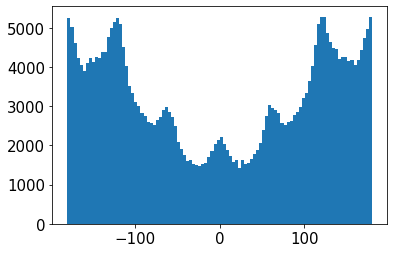

In [150]:
plt.hist(dfs_mc['D_2pi'].eval('h1_ph-h2_ph+360*(h1_ph-h2_ph<-180)-360*(h1_ph-h2_ph>180)'),bins=100)

/home/sebouh/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


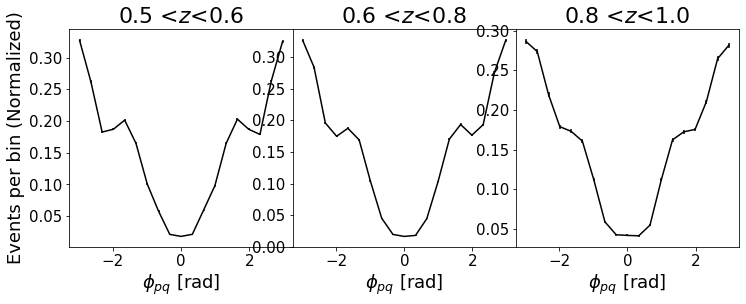

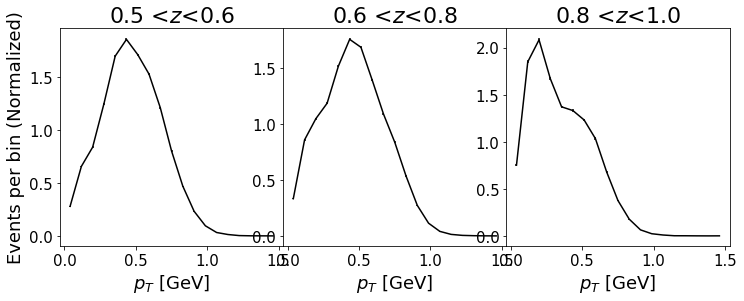

In [37]:
for key in 'D_trigger_cut'.split():
    #determine the suptitle to use
    suptitle = None #suptitles[key]
    
    slice_plot(key, 'h1_cm_ph', '$\\phi_{pq}$ [rad]', np.linspace(-np.pi,np.pi, 20), 
               'h1_z', '$z$', (0.5, 0.6, 0.8,1.0), suptitle=suptitle)
    
    slice_plot(key, 'h1_cm_pt', '$p_T$ [GeV]', np.linspace(0,1.5, 20), 
               'h1_z', '$z$', (0.5, 0.6, 0.8,1.0), suptitle=suptitle)

In [74]:
print(dfs_mc.keys())

dict_keys(['D_2pi', 'D_pi_p', 'D_trigger_cut', 'C_2pi', 'C_pi_p', 'C_trigger_cut'])


In [69]:
d = {}
for a in 'D C Fe Pb'.split():
    q = "dphi< 0.1"
    rd = len(dfs_data[a+"_2pi"].query(q))/len(dfs_data[a+"_trigger_cut"])
    rw = sum(dfs_mc[a+"_2pi"].query(q).weight_reco)/len(dfs_mc[a+"_trigger_cut"])
    d[a] = rd/rw
print({a:d[a]/d['D'] for a in 'C Fe Pb'.split()})

{'C': 1.2854192723717053, 'Fe': 1.0891773832191007, 'Pb': 1.0905072085165464}


In [66]:
print(len(dfs_all[f'MC_{a}_2pi'].query("h2_z>0")))
print(len(dfs_all[f'MC_{a}_2pi']))

62313
62313
